# Atividade 01

In [1]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from scipy import stats
from scipy.stats import ttest_ind, t

In [2]:
# Carregando o dataset
pg = sns.load_dataset('penguins')
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

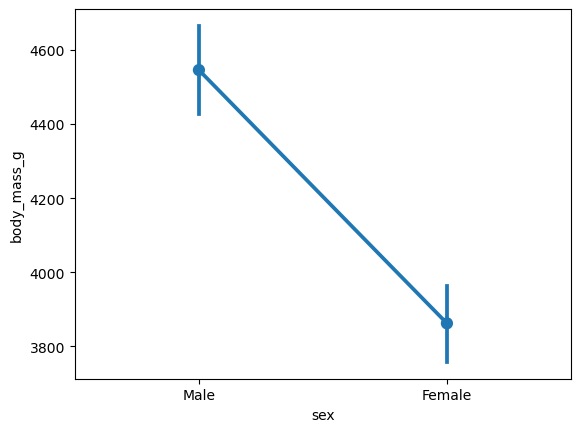

In [3]:
# Criando o gráfico
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [4]:
# Separar os dados de peso por sexo
peso_machos = pg[pg['sex'] == 'Male']['body_mass_g']
peso_femeas = pg[pg['sex'] == 'Female']['body_mass_g']

# Realizar o teste t de Student
t_stat, p_valor = stats.ttest_ind(peso_machos, peso_femeas)

# Definir o nível de significância
alpha = 0.05

# Interpretar o resultado
resultado = "Há evidência suficiente para rejeitar a hipótese nula. " \
            "Existe diferença significativa entre os pesos de machos e fêmeas na população de pinguins." \
            if p_valor < alpha else \
            "Não há evidência suficiente para rejeitar a hipótese nula. " \
            "Não existe diferença significativa entre os pesos de machos e fêmeas na população de pinguins."

# Criar a tabela
tabela = PrettyTable()
tabela.field_names = ["Resultados do Teste t de Student:", "Estatística t", "p-valor"]
tabela.align["Resultado"] = "l"
tabela.add_row([resultado, f"{t_stat:.4f}", f"{p_valor:.6f}"])

# Imprimir a tabela
print(tabela)

+---------------------------------------------------------------------------------------------------------------------------------------------------+---------------+----------+
|                                                         Resultados do Teste t de Student:                                                         | Estatística t | p-valor  |
+---------------------------------------------------------------------------------------------------------------------------------------------------+---------------+----------+
| Há evidência suficiente para rejeitar a hipótese nula. Existe diferença significativa entre os pesos de machos e fêmeas na população de pinguins. |     8.5417    | 0.000000 |
+---------------------------------------------------------------------------------------------------------------------------------------------------+---------------+----------+


## 2)Representação gráfica do teste

Crie uma visualização da estatística do teste, sua distribuição e a região crítica do teste.

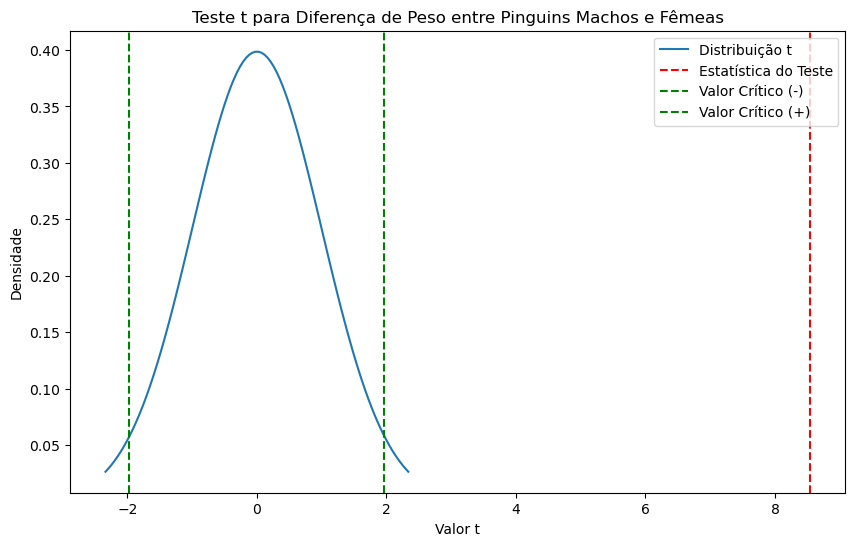

In [5]:
# Supondo que você tenha os dados dos pinguins machos e fêmeas
peso_machos = pg[pg['sex'] == 'Male']['body_mass_g']
peso_femeas = pg[pg['sex'] == 'Female']['body_mass_g']

# Calculando a estatística t usando o teste t de Student independente
t_stat, _ = ttest_ind(peso_machos, peso_femeas)

# Calcular os graus de liberdade
df = peso_machos.shape[0] + peso_femeas.shape[0] - 2

# Nível de significância
alpha = 0.05

# Gerar os valores de x para a distribuição t
x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 100)

# Plotar a distribuição t
plt.figure(figsize=(10, 6))
plt.plot(x, t.pdf(x, df), label='Distribuição t')

# Adicionar a estatística do teste e os valores críticos
plt.axvline(t_stat.item(), color='r', linestyle='--', label='Estatística do Teste')
plt.axvline((-t.ppf(alpha/2, df)).item(), color='g', linestyle='--', label='Valor Crítico (-)')
plt.axvline((t.ppf(alpha/2, df)).item(), color='g', linestyle='--', label='Valor Crítico (+)')

# Adicionar rótulos e legenda
plt.title('Teste t para Diferença de Peso entre Pinguins Machos e Fêmeas')
plt.xlabel('Valor t')
plt.ylabel('Densidade')
plt.legend()
plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [6]:
# Criar a tabela
tabela = PrettyTable()
tabela.field_names = ["Espécie", "Resultados do Teste t de Student por Espécie:", "Estatística t", "p-valor"]
tabela.align["Espécie"] = "l"
tabela.align["Resultado"] = "l"

# Agrupar os dados por espécie e aplicar o teste t para cada grupo
for especie, dados in pg.groupby('species'):
    # Remover linhas com valores ausentes
    dados = dados.dropna(subset=['body_mass_g', 'sex'])
    
    # Separar os dados de peso por sexo para a espécie atual
    peso_machos = dados[dados['sex'] == 'Male']['body_mass_g']
    peso_femeas = dados[dados['sex'] == 'Female']['body_mass_g']
    
    # Verificar se há dados para ambos os sexos
    if len(peso_machos) == 0 or len(peso_femeas) == 0:
        resultado = f"Não há dados disponíveis para ambos os sexos na espécie {especie}."
        tabela.add_row([especie, resultado, "-", "-"])
        continue
    
    # Verificar o tamanho da amostra
    if len(peso_machos) < 2 or len(peso_femeas) < 2:
        resultado = f"Tamanho da amostra insuficiente para a espécie {especie}."
        tabela.add_row([especie, resultado, "-", "-"])
        continue
    
    # Realizar o teste t de Student para a espécie atual
    t_stat, p_valor = stats.ttest_ind(peso_machos, peso_femeas)
    
    # Interpretar o resultado
    alpha = 0.05
    if p_valor < alpha:
        resultado = "Há evidência suficiente para rejeitar a hipótese nula. " \
                    f"Existe diferença significativa entre os pesos de machos e fêmeas na espécie {especie}."
    else:
        resultado = "Não há evidência suficiente para rejeitar a hipótese nula. " \
                    f"Não existe diferença significativa entre os pesos de machos e fêmeas na espécie {especie}."
    
    # Adicionar uma linha à tabela com os resultados da espécie atual
    tabela.add_row([especie, resultado, f"{t_stat:.4f}", f"{p_valor:.6f}"])

# Imprimir a tabela com um cabeçalho
print(tabela)

+-----------+-----------------------------------------------------------------------------------------------------------------------------------------------+---------------+----------+
| Espécie   |                                                 Resultados do Teste t de Student por Espécie:                                                 | Estatística t | p-valor  |
+-----------+-----------------------------------------------------------------------------------------------------------------------------------------------+---------------+----------+
| Adelie    |   Há evidência suficiente para rejeitar a hipótese nula. Existe diferença significativa entre os pesos de machos e fêmeas na espécie Adelie.  |    13.1263    | 0.000000 |
| Chinstrap | Há evidência suficiente para rejeitar a hipótese nula. Existe diferença significativa entre os pesos de machos e fêmeas na espécie Chinstrap. |     5.2077    | 0.000002 |
| Gentoo    |   Há evidência suficiente para rejeitar a hipótese nula. Exis